In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# What do the demographics looks like for the training set?

In [235]:
# read data
demo_data = pd.read_csv('gender_age_train.csv')
demo_data.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


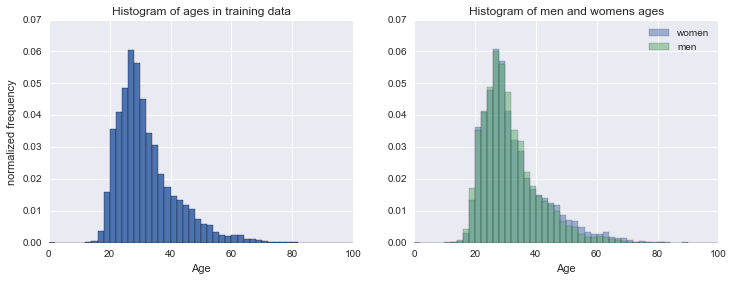

In [236]:
# plot data
age = np.array(demo_data['age'])
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(age, range=[0,100], bins=50, normed=True)
plt.xlabel('Age')
plt.ylabel('normalized frequency')
plt.title('Histogram of ages in training data')

# now plot separately for men and women
women_age = age[np.where(demo_data['gender'] == 'F')]
men_age = age[np.where(demo_data['gender'] == 'M')]
plt.subplot(1,2,2)
plt.hist(women_age, range=[0,100], bins=50, normed=True, alpha=0.5, label='women')
plt.hist(men_age, range=[0,100], bins=50, normed=True, alpha=0.5, label='men')
plt.legend()
plt.xlabel('Age')
plt.title('Histogram of men and womens ages')

Men and women are similar in age. Women tend to be a bit older. It looks like there are some zero ages. This is probably missing data. 

# Phone brand and model

In [237]:
# read data
phone_data = pd.read_csv('phone_brand_device_model.csv')
phone_data.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


Unfortunately, phone brands are in Chinese. Replace names based on translation on Kaggle.

In [238]:
# replace chinese phone brands with english names
chinese_brands = ['三星','天语', '海信', '联想', '欧比', '爱派尔', '努比亚', '优米', '朵唯', '黑米', '锤子', '酷比魔方', '美图',
                 '尼比鲁', '一加', '优购', '诺基亚', '糖葫芦', '中国移动', '语信', '基伍', '青橙', '华硕', '夏新', '维图', 
                  '艾优尼', '摩托罗拉', '乡米', '米奇', '大可乐', '沃普丰', '神舟','摩乐', '飞秒', '米歌', '富可视', '德赛',
                  '梦米', '乐视', '小杨树', '纽曼', '邦华', 'E派', '易派', '普耐尔', '欧新', '西米', '海尔', '波导', '糯米', 
                  '唯米', '酷珀', '谷歌', '昂达', '聆韵', '小米']
english_brands = ['samsung', 'Ktouch', 'hisense', 'lenovo', 'obi', 'ipair', 'nubia', 'youmi', 'dowe', 'heymi', 
                  'hammer', 'koobee', 'meitu', 'nibilu', 'oneplus', 'yougo', 'nokia', 'candy', 'ccmc', 'yuxin', 
                  'kiwu', 'greeno', 'asus', 'panasonic', 'weitu', 'aiyouni', 'motorola', 'xiangmi', 'micky', 
                  'bigcola', 'wpf', 'hasse', 'mole', 'fs', 'mige', 'fks', 'desci', 'mengmi', 'Ishi', 'smallt',
                  'newman', 'banghua', 'epai', 'epai', 'pner', 'ouxin', 'ximi', 'haier', 'bodao', 'nuomi', 'weimi', 
                  'kupo', 'google', 'ada', 'lingyun', 'xiaomi']

if (len(chinese_brands) != len(english_brands)):
    print('ERROR, band names do not match')

for i in range(0, len(chinese_brands)):
    phone_data.loc[phone_data['phone_brand'] == chinese_brands[i], 'phone_brand'] = english_brands[i]
    
phone_data.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,xiaomi,红米
1,1277779817574759137,xiaomi,MI 2
2,5137427614288105724,samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,samsung,Galaxy Note 2


In [281]:
# let's take a look at if there are more phone brands not labelled
len(phone_data.groupby('phone_brand').size())

# add additional column for phone brand integer
phone_data['phone_brand_index'] = 0

phone_data_unique = phone_data.groupby('phone_brand').first()
brands = phone_data_unique.index.unique()

# doesn't need own category if less than 100 users
minor_brands = np.where(phone_data.groupby('phone_brand').size() < 100)
ind = 1
for i in range(0, len(brands)):
    if i in minor_brands[0]:
        phone_data.loc[phone_data['phone_brand'] == brands[i], 'phone_brand_index'] = 0
    else:
        phone_data.loc[phone_data['phone_brand'] == brands[i], 'phone_brand_index'] = ind
        ind += 1

print(ind)
phone_data.head()

36


,device_id,phone_brand,device_model,phone_brand_index
0,-8890648629457979026,xiaomi,红米,25
1,1277779817574759137,xiaomi,MI 2,25
2,5137427614288105724,samsung,Galaxy S4,23
3,3669464369358936369,SUGAR,时尚手机,0
4,-5019277647504317457,samsung,Galaxy Note 2,23


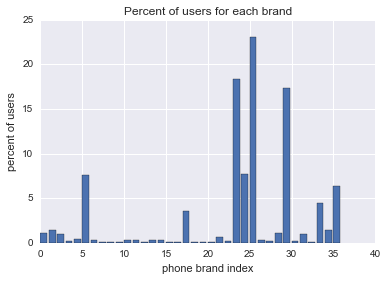

In [282]:
plt.bar(range(0,ind), phone_data.groupby('phone_brand_index').size()/ (phone_data.count()[0].astype('float') + 1) * 100)
plt.xlabel('phone brand index')
plt.ylabel('percent of users')
plt.title('Percent of users for each brand')

We see that although there are many brands, a few brands dominate. The most popular, 25, corresponds to xiaomi, which I know to be a popular brand in China. Samsung is the next popular brand. 

Next, we investigate if there is a difference in popularity between men and women for phone brands.

In [283]:
# merge data frames
all_data = pd.merge(demo_data, phone_data, on='device_id')
all_data.head()

,device_id,gender,age,group,phone_brand,device_model,phone_brand_index
0,-8076087639492063270,M,35,M32-38,xiaomi,MI 2,25
1,-2897161552818060146,M,35,M32-38,xiaomi,MI 2,25
2,-8260683887967679142,M,35,M32-38,xiaomi,MI 2,25
3,-4938849341048082022,M,30,M29-31,xiaomi,红米note,25
4,245133531816851882,M,30,M29-31,xiaomi,MI 3,25


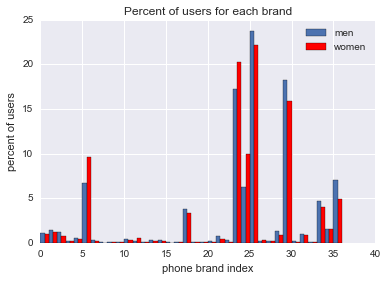

In [284]:
men = all_data[all_data['gender'] == 'M']
women = all_data[all_data['gender'] == 'F']

plt.bar(range(0,ind), 
        men.groupby('phone_brand_index').size()/ (men.count()[0].astype('float') + 1) * 100, 
        width=0.5, label='men')
plt.bar(np.arange(0,ind)+0.5, 
        women.groupby('phone_brand_index').size()/ (women.count()[0].astype('float') + 1) * 100, 
        width=0.5, color='red', label='women')
plt.xlabel('phone brand index')
plt.ylabel('percent of users')
plt.title('Percent of users for each brand')
plt.legend()

We see some differences in preferences between men and women: OPPO brand is preferred by women, as is Samsung and vivo, while Xiaomi, Huawei are is preferred by men. Interestingly, a quick Google search reveals that OPPO is an iphone copy.

# Events

In [4]:
# read data
df_events = pd.read_csv("events.csv", dtype={'device_id': np.str})
df_events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


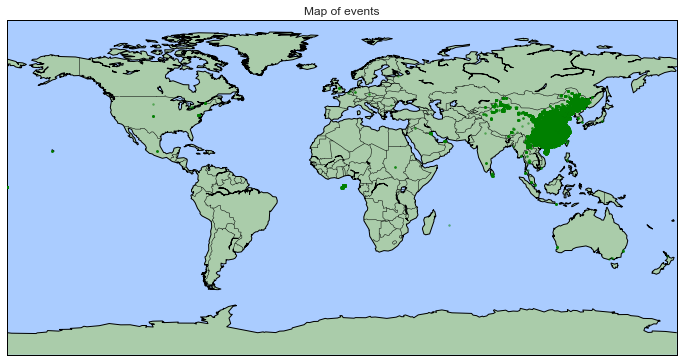

In [59]:
# too many data points to plot on map, so we need to first subsample data
df_events_sample = df_events.sample(n=300000)
plt.figure(1, figsize=(12,6))

# define colors
water_color='#AACCFF'
land_color='#AACCAA'

# Mercator of World
m = Basemap(projection='cyl', resolution='c')

m.drawcoastlines()
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawcountries()
m.drawmapboundary(fill_color=water_color)

# plot data
lat = df_events_sample['longitude'].tolist()
lon = df_events_sample['latitude'].tolist()
m.scatter(lat, lon, color='green', alpha=0.5, zorder=5, s=4)

plt.title("Map of events")
plt.show()

Most of the data is in China, as we would expect. However, there are some points at (0,0) that is probably not real. 

In [85]:
a = np.where(demo_data['gender'] == 'M')[0]

In [90]:
b = np.array(age)

In [92]:
np.array(demo_data['age'])

array([35, 35, 35, ..., 20, 37, 25])

In [275]:
np.arange(0,5)

array([0, 1, 2, 3, 4])